# Final Project Submission

Please fill out:
* Student name: Linda Hutsal
* Student pace: self paced / part time / full time: self paced
* Scheduled project review date/time: 
* Instructor name: Morgan Jones
* Blog post URL:

## Import and Settings
First, I'll import the libraries needed and call the appropriate settings

In [1]:
#import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm



## Importing the data and initial viewing
Next is importing the various data sets using the pandas dataframes:
1. Kings County data, which is in a csv file

For the dataset, we'll look at:
1. a sample of the data
2. the info for the dataset, including data types and count of non-null values
3. the describe table for the dataset, which includes statistical summary values

In [2]:
#import data and put in dataframe
data = pd.read_csv("data/kc_house_data.csv")
print(data.shape)
data.head()


(30155, 25)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


Now let's look at the data types and number of non-null values

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

It looks like there are quite a few columns that are objects: waterfront, greenbelt, nuisance, view, condition, grade, heat_source, and sewer system. A few of these may factor into the selling price, but not all of them can be changed by the homeowner (waterfront, greenbelt, view, nuisance, sewer system, etc.).

In [4]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


There are 30,155 records, with prices ranging from $27,360 to $30,750,000, with the average price being $1,108,536. There are on average 3.4 bedrooms, 2.3 bathrooms and 2,112 square feet of living space.

## Data Pre-processing
Now let's do some data pre-processing to check for duplicates and null values.

In [5]:
#find duplicates
print(data.duplicated().any())

True


In [6]:
data[data.duplicated()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
4846,1233100736,9/28/2021,2600000.0,3,4.0,3500,8455,2.0,NO,NO,...,PUBLIC,2590,1410,500,290,2019,0,"12611 Northeast 87th Place, Kirkland, Washingt...",47.68069,-122.172135


There looks to be one duplicate row. Let's inspect it further.

In [7]:
#look at duplicate record
data[data['id']==1233100736]


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
4845,1233100736,9/28/2021,2600000.0,3,4.0,3500,8455,2.0,NO,NO,...,PUBLIC,2590,1410,500,290,2019,0,"12611 Northeast 87th Place, Kirkland, Washingt...",47.68069,-122.172135
4846,1233100736,9/28/2021,2600000.0,3,4.0,3500,8455,2.0,NO,NO,...,PUBLIC,2590,1410,500,290,2019,0,"12611 Northeast 87th Place, Kirkland, Washingt...",47.68069,-122.172135


Let's remove the duplicate.

In [8]:
#drop duplicate
data.drop_duplicates(inplace=True)

In [9]:
#check to make sure it was removed
data[data.duplicated()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long


Now let's check for null or other na type values.

In [10]:
data.isin(['?', '#', 'NaN', 'null', 'N/A', '-', 0]).sum()

id                   0
date                 0
price                0
bedrooms            44
bathrooms           31
sqft_living          0
sqft_lot             0
floors               0
waterfront           0
greenbelt            0
nuisance             0
view                 0
condition            0
grade                0
heat_source          0
sewer_system         0
sqft_above           0
sqft_basement    15471
sqft_garage      10009
sqft_patio        6760
yr_built             0
yr_renovated     28782
address              0
lat                  0
long                 0
dtype: int64

Let's further inspect the bedrooms field.

In [11]:
#rows for bedroom that have a non-numeric or 0 value
data[data['bedrooms'].isin(['?', '#', 'NaN', 'null', 'N/A', '-', 0])]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
573,3920030050,5/19/2022,930000.0,0,0.0,1617,2156,3.0,NO,NO,...,PUBLIC,2156,0,0,0,2009,0,"6019 Roosevelt Way Northeast, Seattle, Washing...",47.672700,-122.317810
1289,2768301406,3/2/2022,1090000.0,0,0.0,1500,1262,3.0,NO,NO,...,PUBLIC,1500,0,0,0,2021,0,"A, Leadwood, Missouri 63653, United States",37.859790,-90.581130
1310,3462800015,11/10/2021,360000.0,0,0.0,910,19000,1.0,NO,NO,...,PRIVATE,910,0,0,250,1946,0,"26125 79th Avenue South, Kent, Washington 9803...",47.366765,-122.235430
1952,2020069042,9/27/2021,399990.0,0,0.0,1677,43264,1.0,NO,NO,...,PUBLIC,1677,0,0,0,1969,0,"43407 212th Avenue Southeast, Enumclaw, Washin...",47.211660,-122.059200
2044,6896300047,9/17/2021,509000.0,0,1.0,400,2385,1.0,NO,NO,...,PUBLIC,400,0,0,0,1946,0,"8416 B Island Dr S, Seattle, Washington 98118,...",47.528030,-122.261290
4835,9523101492,1/27/2022,830000.0,0,0.0,1255,983,3.0,NO,NO,...,PUBLIC,1672,0,0,0,2018,0,"307 North 65th Street, Seattle, Washington 981...",47.675845,-122.354885
5811,2424049035,8/19/2021,13950000.0,0,1.0,290,178017,1.0,YES,NO,...,PUBLIC,290,0,0,160,1940,0,"5045 Forest Avenue Southeast, Mercer Island, W...",47.556910,-122.230600
7545,4318200415,12/17/2021,1225000.0,0,0.0,1940,8893,2.0,NO,NO,...,PUBLIC,1940,0,220,210,2016,0,"7453 Gatewood Road Southwest, Seattle, Washing...",47.536140,-122.385170
8338,9265400150,7/20/2021,550000.0,0,0.0,1370,8169,2.0,NO,NO,...,PUBLIC,1370,0,480,350,1989,0,"615 Yakima Avenue South, Pacific, Washington 9...",47.258675,-122.255300
8391,9178601015,11/30/2021,1625000.0,0,1.0,290,4000,1.0,NO,NO,...,PUBLIC,290,0,0,0,2018,0,"2308 North 41st Street, Seattle, Washington 98...",47.656915,-122.330900


It looks like the 44 rows are all having a 0 value for bedrooms. This may be accurate (studio apartment) or it could be inaccurate data. If I look at the first property with 0 bedrooms and google the address, the property has 3 bedrooms. The second property doesn't have a real address. The third property may actually be 0 bedrooms. The fourth property has 3 bedrooms. I feel comfortable dropping the records with 0 bedrooms.

Let's drop the rows that are having zero values for bedrooms and bathrooms, since it's relatively small compared to the total dataset.

In [12]:
#drop rows with null or 0 value
data.isin(['?', '#', 'NaN', 'null', 'N/A', '-', 0]).sum()
data = data[~data['bedrooms'].isin(['?', '#', 'NaN', 'null', 'N/A', '-', 0])]
data = data[~data['bathrooms'].isin(['?', '#', 'NaN', 'null', 'N/A', '-', 0])]

Let's check to make sure those rows have been dropped.

In [13]:
#recheck data after dropping rows with null or 0 value
data.isin(['?', '#', 'NaN', 'null', 'N/A', '-', 0]).sum()

id                   0
date                 0
price                0
bedrooms             0
bathrooms            0
sqft_living          0
sqft_lot             0
floors               0
waterfront           0
greenbelt            0
nuisance             0
view                 0
condition            0
grade                0
heat_source          0
sewer_system         0
sqft_above           0
sqft_basement    15427
sqft_garage       9967
sqft_patio        6727
yr_built             0
yr_renovated     28735
address              0
lat                  0
long                 0
dtype: int64

Now let's look to see if the values in garage are zero or zome other value.

In [14]:
#check garage for null or 0 value
data[data['sqft_garage'].isin(['?', '#', 'NaN', 'null', 'N/A', '-'])]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long


They look to be all zero. Let's check the patio square footage column.

In [15]:
#check sqft_patio for null or 0 value
data[data['sqft_patio'].isin(['?', '#', 'NaN', 'null', 'N/A', '-'])]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long


Let's review the remaining fields that have null values

In [16]:
#count of null values
data.isnull().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      25
sewer_system     12
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
dtype: int64

I'll go ahead and remove the heat_source rows and sewer_system rows with null values.

In [17]:
#drop rows with null or 0 values
data = data[~data['heat_source'].isin(['?', '#', 'NaN', 'null', 'N/A', '-', 0])]
data = data[~data['sewer_system'].isin(['?', '#', 'NaN', 'null', 'N/A', '-', 0])]

The project description recommends skipping these fields if short on time:
<br>- date
<br>- view
<br>- sqft_above
<br>- sqft_basement
<br>- yr_renovated
<br>- address
<br>- lat
<br>- long
<br>

So I will go ahead and remove those columns

In [18]:
#dropping columns as recommended
data = data.drop(['view', 'sqft_above', 'sqft_basement', 'yr_renovated', 'address', 'lat', 'long'], axis=1)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30104 entries, 0 to 30154
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            30104 non-null  int64  
 1   date          30104 non-null  object 
 2   price         30104 non-null  float64
 3   bedrooms      30104 non-null  int64  
 4   bathrooms     30104 non-null  float64
 5   sqft_living   30104 non-null  int64  
 6   sqft_lot      30104 non-null  int64  
 7   floors        30104 non-null  float64
 8   waterfront    30104 non-null  object 
 9   greenbelt     30104 non-null  object 
 10  nuisance      30104 non-null  object 
 11  condition     30104 non-null  object 
 12  grade         30104 non-null  object 
 13  heat_source   30079 non-null  object 
 14  sewer_system  30092 non-null  object 
 15  sqft_garage   30104 non-null  int64  
 16  sqft_patio    30104 non-null  int64  
 17  yr_built      30104 non-null  int64  
dtypes: float64(3), int64(7), o

Let's further investigate some of the object columns and their values.

In [20]:
#values for waterfront
data.groupby(['waterfront'])['id'].count()

waterfront
NO     29591
YES      513
Name: id, dtype: int64

In [21]:
#values for condition
data.groupby(['condition'])['id'].count()

condition
Average      18507
Fair           226
Good          8052
Poor            62
Very Good     3257
Name: id, dtype: int64

In [22]:
#values for grade
data.groupby(['grade'])['id'].count()

grade
1 Cabin              1
10 Very Good      1370
11 Excellent       406
12 Luxury          122
13 Mansion          24
2 Substandard        1
3 Poor               8
4 Low               49
5 Fair             388
6 Low Average     2850
7 Average        11678
8 Good            9403
9 Better          3804
Name: id, dtype: int64

Next let's look at the date field.

In [23]:
#convert date field from string to date
data['date']= pd.to_datetime(data['date'])

#find the min value
data['date'].min()

Timestamp('2021-06-10 00:00:00')

In [24]:
#find the max value
data['date'].max()

Timestamp('2022-06-09 00:00:00')

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30104 entries, 0 to 30154
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            30104 non-null  int64         
 1   date          30104 non-null  datetime64[ns]
 2   price         30104 non-null  float64       
 3   bedrooms      30104 non-null  int64         
 4   bathrooms     30104 non-null  float64       
 5   sqft_living   30104 non-null  int64         
 6   sqft_lot      30104 non-null  int64         
 7   floors        30104 non-null  float64       
 8   waterfront    30104 non-null  object        
 9   greenbelt     30104 non-null  object        
 10  nuisance      30104 non-null  object        
 11  condition     30104 non-null  object        
 12  grade         30104 non-null  object        
 13  heat_source   30079 non-null  object        
 14  sewer_system  30092 non-null  object        
 15  sqft_garage   30104 non-null  int64 

It's a little more challenging as the field is currently in type object. Let's look to create a function that can convert the date into a season that could be more useful.

In [26]:
#check to make sure month and day can be extracted
data.date.dt.month
data.date.dt.day

0        24
1        13
2        29
3        14
4        24
         ..
30150    30
30151    16
30152    27
30153    24
30154    29
Name: date, Length: 30104, dtype: int64

In [27]:
from datetime import datetime
date_str = '2023-02-28 14:30:00'
date_format = '%Y-%m-%d %H:%M:%S'
d_sold = datetime.strptime(date_str, date_format)

season_lookup = str(d_sold.month) + str(d_sold.day)
print(season_lookup)

228


In [28]:
from datetime import datetime

def create_season(d_sold):
#    d_split = d_sold.split("/")
#    season_lookup = int(d_split[0]+f"{int(d_split[1]):02d}")
    season_lookup = int(str(d_sold.month) + str(d_sold.day))
    if season_lookup >= 320 and season_lookup < 621: 
        season = 'spring'
    elif season_lookup >= 621 and season_lookup < 922:
        season = 'summer'
    elif season_lookup >=922 and season_lookup < 1221:
        season = 'fall'
    else:
        season = 'winter'
    return season

Let's check to make sure the function is working as expected.

In [29]:
#check function
date_str = '2021-4-20 14:30:00'
date_format = '%Y-%m-%d %H:%M:%S'
d = datetime.strptime(date_str, date_format)
check = create_season(d)
check

'spring'

Next let's create a new column called Season_sold

In [30]:
#create new column for season sold
data['Season_sold'] = data['date'].apply(create_season)

In [31]:
#review a few sample records to make sure the function was applied correctly
data.head(30)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,condition,grade,heat_source,sewer_system,sqft_garage,sqft_patio,yr_built,Season_sold
0,7399300360,2022-05-24,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,Good,7 Average,Gas,PUBLIC,0,40,1969,spring
1,8910500230,2021-12-13,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,Average,7 Average,Oil,PUBLIC,0,240,1950,fall
2,1180000275,2021-09-29,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,Average,7 Average,Gas,PUBLIC,0,0,1956,fall
3,1604601802,2021-12-14,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,Average,9 Better,Gas,PUBLIC,200,270,2010,fall
4,8562780790,2021-08-24,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,Average,7 Average,Electricity,PUBLIC,550,30,2012,summer
5,2807100156,2021-07-20,625000.0,2,1.0,1190,5688,1.0,NO,NO,YES,Average,7 Average,Electricity,PUBLIC,300,0,1948,summer
6,5122400111,2021-11-17,1317227.0,3,3.0,2080,27574,1.0,NO,NO,NO,Good,9 Better,Oil,PRIVATE,0,150,1951,fall
7,7137850210,2022-04-28,820000.0,3,2.5,2214,3506,2.0,NO,NO,NO,Average,8 Good,Gas,PUBLIC,440,206,2019,spring
8,2944500680,2022-03-17,780000.0,4,2.5,2340,8125,2.0,NO,NO,NO,Average,8 Good,Gas,PUBLIC,440,70,1989,winter
9,2619950340,2021-06-21,975000.0,4,2.5,2980,5859,2.0,NO,NO,NO,Average,8 Good,Gas,PUBLIC,540,170,2011,summer


Now let's run a correlation to see which of the numeric fields have the highest correlation with price.

In [32]:
data.corr()["price"]

id            -0.033664
price          1.000000
bedrooms       0.293316
bathrooms      0.483878
sqft_living    0.611813
sqft_lot       0.084724
floors         0.182198
sqft_garage    0.265502
sqft_patio     0.314670
yr_built       0.096813
Name: price, dtype: float64

In [33]:
data.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_garage,sqft_patio,yr_built
id,1.000000,-0.033664,-0.006570,-0.012032,-0.027606,-0.119074,0.032338,-0.007974,-0.041747,0.023102
price,-0.033664,1.000000,0.293316,0.483878,0.611813,0.084724,0.182198,0.265502,0.314670,0.096813
bedrooms,-0.006570,0.293316,1.000000,0.586206,0.639440,0.006005,0.151581,0.317617,0.181495,0.148503
bathrooms,-0.012032,0.483878,0.586206,1.000000,0.774476,0.036970,0.409528,0.456573,0.326878,0.446829
sqft_living,-0.027606,0.611813,0.639440,0.774476,1.000000,0.121939,0.304856,0.511638,0.395972,0.292598
sqft_lot,-0.119074,0.084724,0.006005,0.036970,0.121939,1.000000,-0.031171,0.088761,0.157130,0.002470
floors,0.032338,0.182198,0.151581,0.409528,0.304856,-0.031171,1.000000,0.133942,0.126113,0.544523
sqft_garage,-0.007974,0.265502,0.317617,0.456573,0.511638,0.088761,0.133942,1.000000,0.215630,0.448396
sqft_patio,-0.041747,0.314670,0.181495,0.326878,0.395972,0.157130,0.126113,0.215630,1.000000,0.138767
yr_built,0.023102,0.096813,0.148503,0.446829,0.292598,0.002470,0.544523,0.448396,0.138767,1.000000


It looks like the square footage of living space has the highest correlation, which makes sense. Let's plot it on a graph.

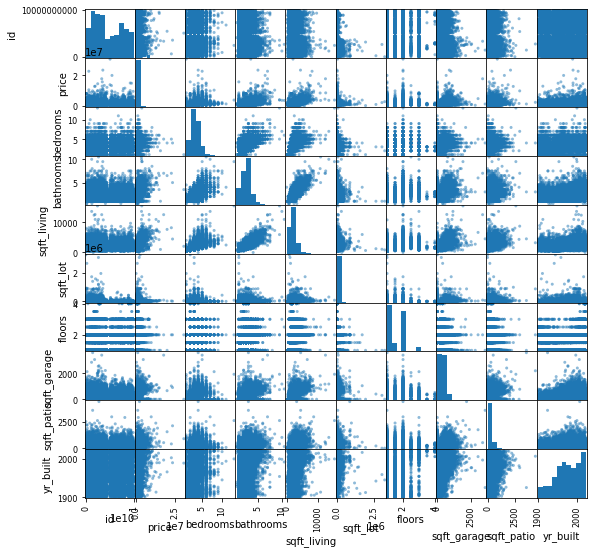

In [34]:
pd.plotting.scatter_matrix(data,figsize  = [9, 9]);
plt.show()

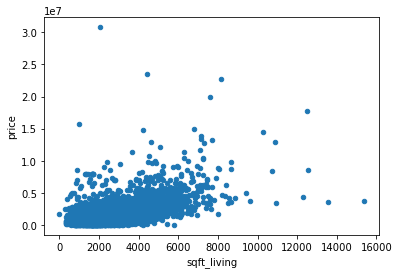

In [35]:
data.plot.scatter(x="sqft_living", y="price");

Next let's create a simple linear regression.

## Modeling
Let's start creating linear regressions

In [36]:
y = data["price"]
X_baseline = data[["sqft_living"]]

In [37]:
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                 1.801e+04
Date:                Sun, 03 Mar 2024   Prob (F-statistic):               0.00
Time:                        12:34:50   Log-Likelihood:            -4.4818e+05
No. Observations:               30104   AIC:                         8.964e+05
Df Residuals:                   30102   BIC:                         8.964e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.966e+04   9745.996     -8.174      

The p-value is zero, meaning the result is statistically significant, however the R-squared is only .374, meaning the model only explains 37% of the variance.

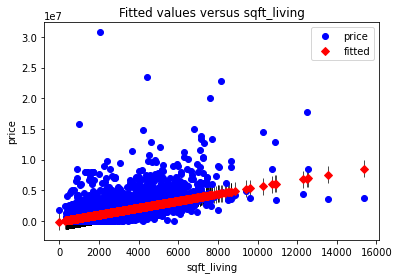

In [38]:
sm.graphics.plot_fit(baseline_results, "sqft_living")
plt.show()

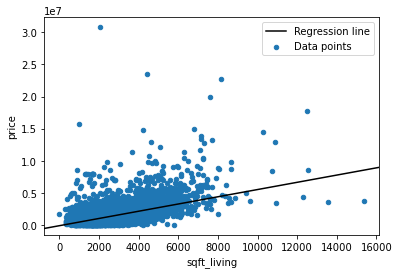

In [39]:
fig, ax = plt.subplots()
data.plot.scatter(x="sqft_living", y="price", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=baseline_results, label="Regression line", ax=ax, color="black")
ax.legend();

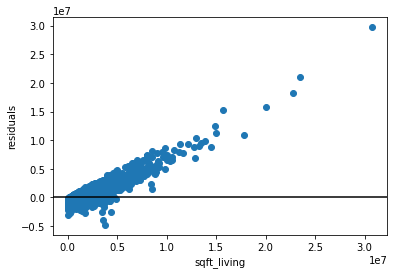

In [40]:
fig, ax = plt.subplots()

ax.scatter(data["price"], baseline_results.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("sqft_living")
ax.set_ylabel("residuals");

Let's create a second model that also factors in the number of bathrooms, since that was the next highest correlated variable to price.

In [41]:
X_second = data[["sqft_living", "bathrooms"]]
X_second

,sqft_living,bathrooms
0,1180,1.0
1,2770,2.5
2,2880,2.0
3,2160,3.0
4,1120,2.0
...,...,...
30150,1910,2.0
30151,2020,2.0
30152,1620,2.0
30153,2570,2.5


In [42]:
second_model = sm.OLS(y, sm.add_constant(X_second))
second_results = second_model.fit()

print(second_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     9014.
Date:                Sun, 03 Mar 2024   Prob (F-statistic):               0.00
Time:                        12:34:51   Log-Likelihood:            -4.4817e+05
No. Observations:               30104   AIC:                         8.963e+05
Df Residuals:                   30101   BIC:                         8.964e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.011e+05   1.15e+04     -8.773      

The p-value indicates it is statistically significant, however the R-square did not change meaningfully.

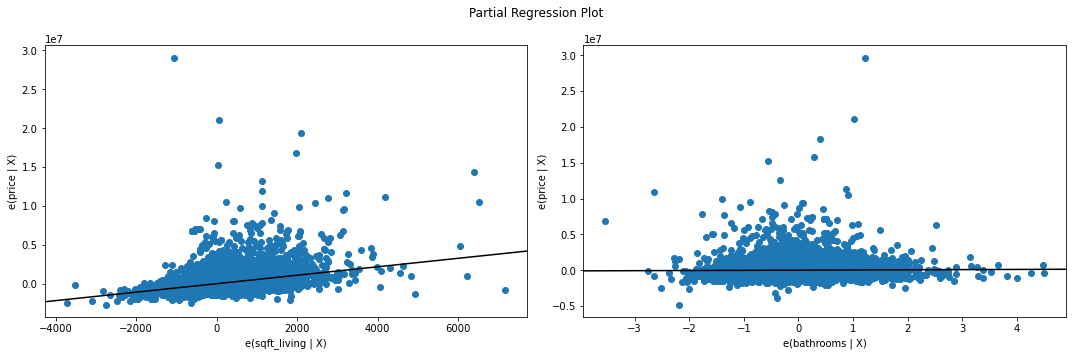

In [43]:
fig = plt.figure(figsize=(15,5))
sm.graphics.plot_partregress_grid(second_results, exog_idx=["sqft_living", "bathrooms"], fig=fig)
plt.tight_layout()
plt.show()

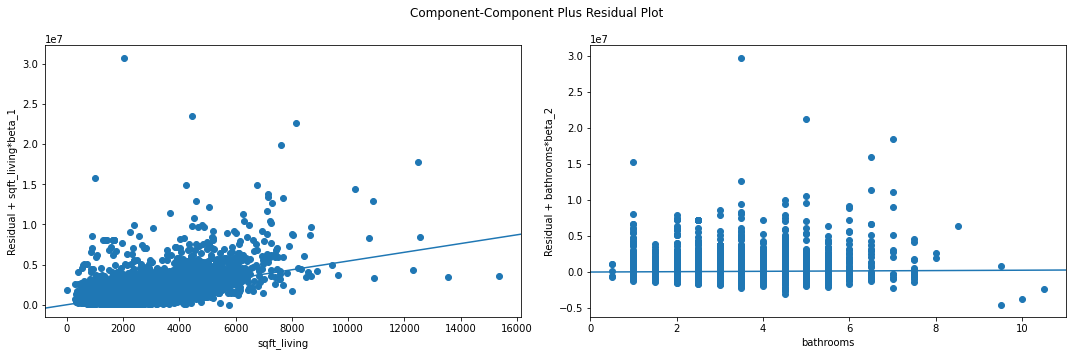

In [44]:
fig = plt.figure(figsize=(15,5))
sm.graphics.plot_ccpr_grid(second_results, exog_idx=["sqft_living", "bathrooms"], grid=(1,2), fig=fig)
plt.tight_layout()
plt.show()

Now let's try adding all of the numeric fields, but exclude price and id since price is the target and id is not a meaningful field for the linear regression.

In [45]:
# dropping price because this is our target, then only selecting numeric features
X_all = data.drop(["price", "id"], axis=1).select_dtypes("number")
X_all

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_garage,sqft_patio,yr_built
0,4,1.0,1180,7140,1.0,0,40,1969
1,5,2.5,2770,6703,1.0,0,240,1950
2,6,2.0,2880,6156,1.0,0,0,1956
3,3,3.0,2160,1400,2.0,200,270,2010
4,2,2.0,1120,758,2.0,550,30,2012
...,...,...,...,...,...,...,...,...
30150,5,2.0,1910,4000,1.5,0,210,1921
30151,3,2.0,2020,5800,2.0,0,520,2011
30152,3,2.0,1620,3600,1.0,240,110,1995
30153,3,2.5,2570,2889,2.0,480,100,2006


In [46]:
third_model = sm.OLS(y, sm.add_constant(X_all))
third_results = third_model.fit()

print(third_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     2626.
Date:                Sun, 03 Mar 2024   Prob (F-statistic):               0.00
Time:                        12:34:52   Log-Likelihood:            -4.4726e+05
No. Observations:               30104   AIC:                         8.945e+05
Df Residuals:                   30095   BIC:                         8.946e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.668e+06   3.28e+05     23.355      

The p-value is statistically significant for everything except for the sqft_lot field. However the R-squared is still very small at 0.411. Not much improvement from the first model.

Next let's try adding in an object field, using the one we created of Season_sold. 

In [47]:

X = pd.get_dummies(data.drop(["price", "id", "sqft_lot"], axis=1), columns=["Season_sold"], drop_first=True).select_dtypes("number")
X

,bedrooms,bathrooms,sqft_living,floors,sqft_garage,sqft_patio,yr_built,Season_sold_spring,Season_sold_summer,Season_sold_winter
0,4,1.0,1180,1.0,0,40,1969,1,0,0
1,5,2.5,2770,1.0,0,240,1950,0,0,0
2,6,2.0,2880,1.0,0,0,1956,0,0,0
3,3,3.0,2160,2.0,200,270,2010,0,0,0
4,2,2.0,1120,2.0,550,30,2012,0,1,0
...,...,...,...,...,...,...,...,...,...,...
30150,5,2.0,1910,1.5,0,210,1921,0,0,0
30151,3,2.0,2020,2.0,0,520,2011,1,0,0
30152,3,2.0,1620,1.0,240,110,1995,1,0,0
30153,3,2.5,2570,2.0,480,100,2006,0,0,1


In [48]:
import numpy as np
np.asarray(X).dtype 

dtype('float64')

In [49]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30104 entries, 0 to 30154
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bedrooms            30104 non-null  int64  
 1   bathrooms           30104 non-null  float64
 2   sqft_living         30104 non-null  int64  
 3   floors              30104 non-null  float64
 4   sqft_garage         30104 non-null  int64  
 5   sqft_patio          30104 non-null  int64  
 6   yr_built            30104 non-null  int64  
 7   Season_sold_spring  30104 non-null  uint8  
 8   Season_sold_summer  30104 non-null  uint8  
 9   Season_sold_winter  30104 non-null  uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 1.9 MB


In [58]:
fourth_model = sm.OLS(y, sm.add_constant(X))
fourth_results = fourth_model.fit()

print(fourth_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     2137.
Date:                Sun, 03 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:51:46   Log-Likelihood:            -4.4716e+05
No. Observations:               30104   AIC:                         8.943e+05
Df Residuals:                   30093   BIC:                         8.944e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               7.585e+06   3.27

In [59]:
fourth_results.fvalue, fourth_results.f_pvalue

(2136.888692866825, 0.0)

The R-squared improved dramatically, with a value of 0.767 and an adjusted R-squared of 0.766. The p-value is statistically significant for everything.

In [60]:
mae = fourth_results.resid.abs().sum() / len(y)
mae

379110.7678808348

In [61]:
rmse = ((fourth_results.resid ** 2).sum() / len(y)) ** 0.5
rmse

683394.2835854803

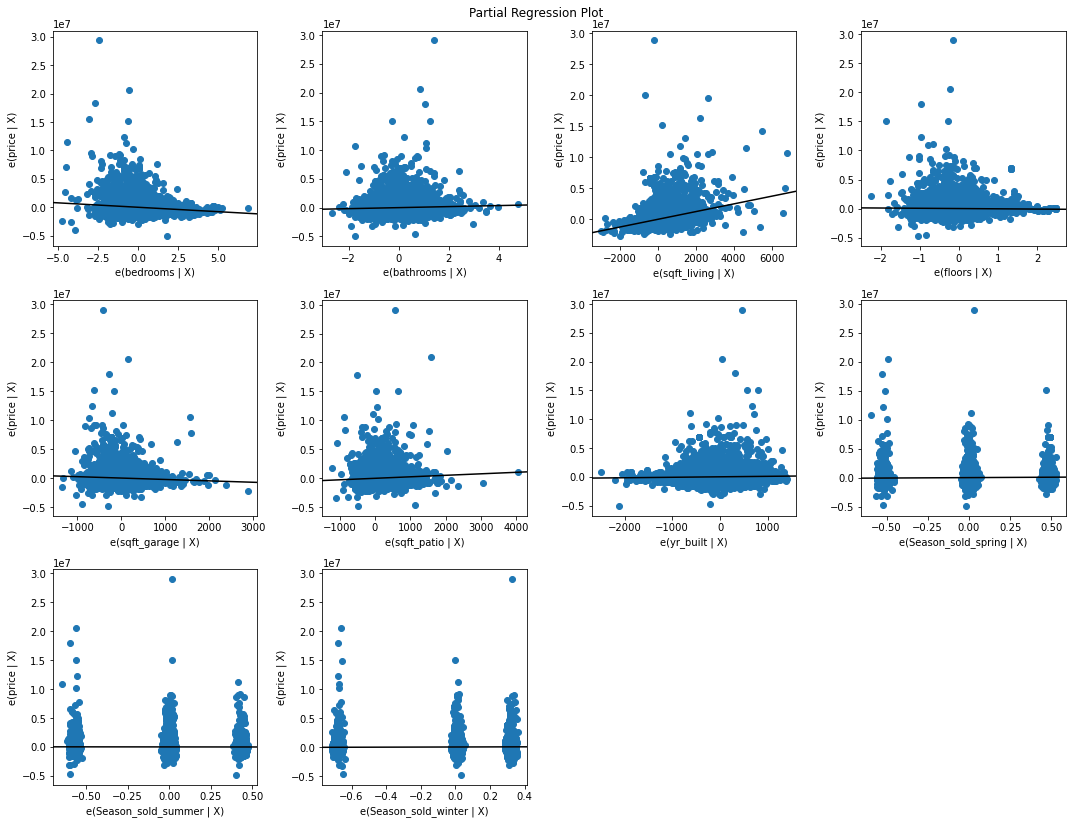

In [54]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,15))
sm.graphics.plot_partregress_grid(
    fourth_results,
    exog_idx=list(X.columns),
    grid=(4,4),
    fig=fig)
plt.tight_layout()
plt.show()

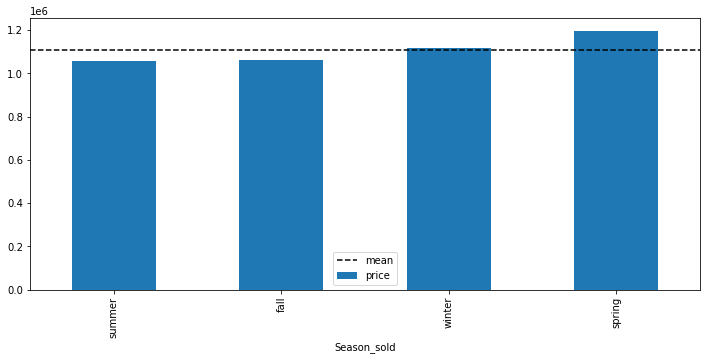

In [55]:
fig, ax = plt.subplots(figsize=(12,5))
data.groupby("Season_sold").mean().sort_values(by="price").plot.bar(y="price", ax=ax)
ax.axhline(y=data["price"].mean(), label="mean", color="black", linestyle="--")
ax.legend();

<AxesSubplot:>

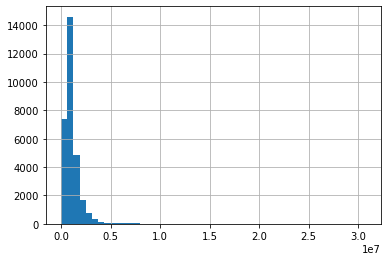

In [64]:
y.hist(bins=50)

<AxesSubplot:>

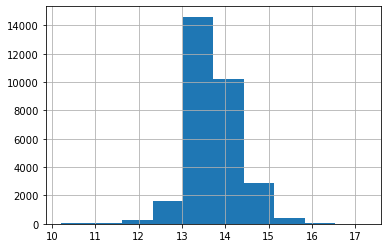

In [57]:
y_scld = np.log(y)
y_scld.hist()